In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.linalg import solve, norm

%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def acrobot_motion(x, u):
    friction = 0.1
    g = 9.8
    M = np.array([[3 + 2*cos(x[1]), 1+cos(x[1])],[1+cos(x[1]), 1]])
    c1 = x[3]*(2*x[2]+x[3])*sin(x[1]) + 2*g*sin(x[0]) + g*sin(x[0]+x[1])
    c2 = -x[2]**2*sin(x[1]) + g*sin(x[0]+x[1])
    b = np.array([c1-friction*x[2], c2-friction*x[3]])
    
    a = np.concatenate([x[2:4], solve(M, b)])
    B = np.concatenate([[0,0],solve(M, np.array([0,1]))])
    xd = a + B*u
    return xd

In [3]:
Duration = 200;
FPS = 30;
dt = 1./FPS

N = int(Duration*FPS);
xinit = np.zeros(4)+0.1*np.random.normal(size = 4);
u = np.zeros(N)

x = np.zeros((N, 4))
x[0] = xinit
for i in range(N-1):
    x[i+1] = x[i] + dt*acrobot_motion(x[i], u[i])

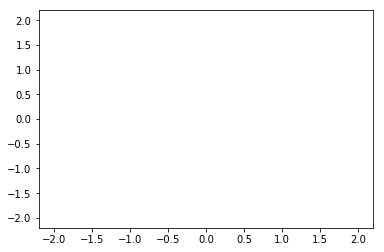

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -2.2, 2.2))
ax.set_ylim((-2.2, 2.2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(k):
    x1 = cos(x[k,0]+pi/2);
    y1 = sin(x[k,0]+pi/2);
    x2 = x1 + cos(x[k,0]+x[k,1]+pi/2);
    y2 = y1 + sin(x[k,0]+x[k,1]+pi/2);
    
    xs = [0, x1, x2]
    ys = [0, y1, y2]
    line.set_data(xs, ys)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [5]:
HTML(anim.to_html5_video())